In [1]:
 # python
import sys, os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout, llpnanoaodschema
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
importlib.reload(llpnanoaodschema)
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
import mplhep as hep

In [2]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

<Client: 'tls://192.168.161.139:8786' processes=1 threads=1, memory=2.89 GiB>

In [3]:
samples = [
    #"2Mu2E_100GeV_5GeV_400mm",
    #"2Mu2E_100GeV_5GeV_400mm",
    #"2Mu2E_150GeV_5GeV_2p7mm",
    "2Mu2E_200GeV_0p25GeV_10p0mm",
     "2Mu2E_200GeV_1p2GeV_48p0mm",
     "2Mu2E_200GeV_5p0GeV_200p0mm",
     # "2Mu2E_1000GeV_0p25GeV_2p0mm",
     # "2Mu2E_1000GeV_5p0GeV_40p0mm"
    #"2Mu2E_500GeV_5GeV_80mm",
    #"2Mu2E_800GeV_5GeV_0p5mm",
    #"2Mu2E_1000GeV_5GeV_0p4mm",
    #"2Mu2E_1000GeV_5GeV_0p04mm",
    #"2Mu2E_1000GeV_5GeV_20mm",
    #"2Mu2E_100GeV_1p2GeV_9p6mm",
    #"2Mu2E_1000GeV_5GeV_40mm",
    #"2Mu2E_100GeV_p25GeV_400mm",
   # "2Mu2E_1000GeV_5GeV_4mm",
]

fileset = utilities.make_fileset(
    samples,
    "llpNanoAOD_v2",
    location_cfg="signal_2mu2e_v10.yaml",
    max_files=5,
)

In [4]:
channels = [
    # "baseNoLj", 
    "baseNoLj_A_mumu_matched_lj_highPT",
    "baseNoLj_A_mumu_highPtA",
    "baseNoLj_A_mumu_matched_pflj_highPT",
    "baseNoLj_A_mumu_matched_dsalj_highPT",
    "baseNoLj_A_mumu_matched_pfDsalj_highPT",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["lj_reco_effi_base",],
    lj_reco_choices=["0.4"],
    unweighted_hist=True,
   
)
runner = processor.Runner(
    executor=processor.FuturesExecutor(),
    # executor=processor.DaskExecutor(client=client),
    schema=llpnanoaodschema.LLPNanoAODSchema,
    #maxchunks=1,
    skipbadfiles=True,
    savemetrics=True,
)
# test if processor is serializable
output = runner.run(fileset, treename="Events", processor_instance=p)


Output()

Output()

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(
/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(
/usr/local/lib/python3.12/site-packages/awkward/_nplikes/array_module.py:285: RuntimeWarning: invalid value encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))


/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(
/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(


2Mu2E_200GeV_0p25GeV_10p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_200GeV_1p2GeV_48p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_200GeV_5p0GeV_200p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb


In [10]:
def plot_channels(sample, histogram, channels, legend=None, log=False, 
              density=False, folder_name=None, file_name=None, text=""):
    if legend==None:
        legend=channels
    if folder_name ==None:
        folder_name="my_plots"
    if file_name==None:
        file_name="_"
    os.makedirs(folder_name, exist_ok=True) 
    plt.figure(figsize=(12, 10))
    hists = output["out"][sample]["hists"][histogram]
    for c in channels:
        if density==True:
            utilities.plot(hists[c, ::2j], density=True, yerr=True, flow="none")
        else:
            utilities.plot(hists[c, ::2j], density=False, yerr=True, flow="none")
    plt.legend(legend)
    if log==True:
        plt.yscale("log")
    hep.label.exp_text(text=text, loc=2) 
    file_name=file_name+histogram
    save_path = os.path.join(folder_name, file_name)
    plt.savefig(save_path)
    plt.show()
    plt.close()
        

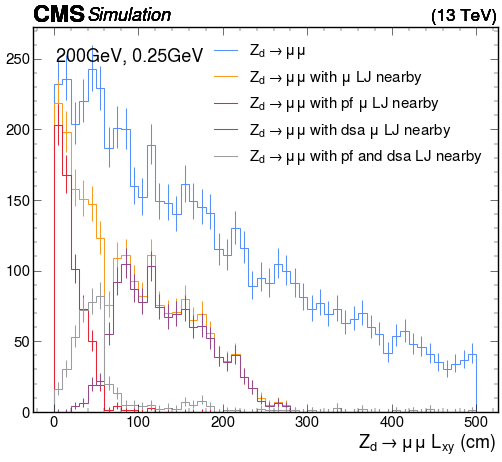

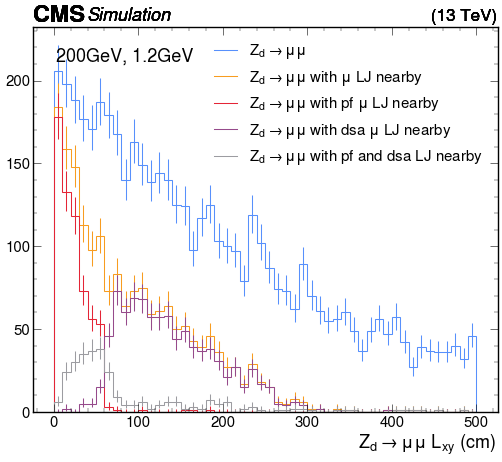

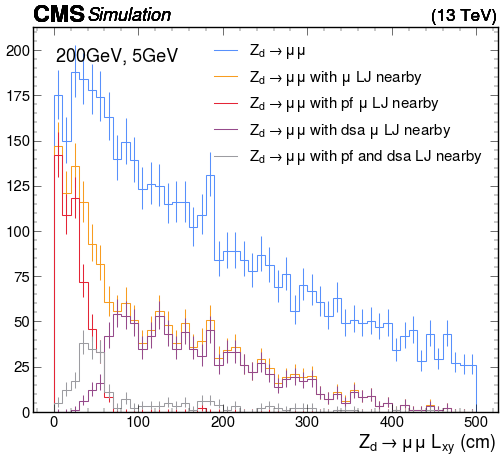

In [12]:
legend=[
    r"$Z_d \rightarrow \mu\mu $",
    r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
    r"$Z_d \rightarrow \mu\mu$ with pf $\mu$ LJ nearby", 
    r"$Z_d \rightarrow \mu\mu$ with dsa $\mu$ LJ nearby",
    r"$Z_d \rightarrow \mu\mu$ with pf and dsa LJ nearby",
]

channels = [
    #"baseNoLj", 
    "baseNoLj_A_mumu_highPtA",
    "baseNoLj_A_mumu_matched_lj_highPT",
    "baseNoLj_A_mumu_matched_pflj_highPT",
    "baseNoLj_A_mumu_matched_dsalj_highPT",
    "baseNoLj_A_mumu_matched_pfDsalj_highPT",
]

plot_channels("2Mu2E_200GeV_0p25GeV_10p0mm", "genAs_toMu_lxy", channels, legend=legend,
             folder_name="separate_mu", file_name="200_0p25_", text="200GeV, 0.25GeV")
plot_channels("2Mu2E_200GeV_1p2GeV_48p0mm", "genAs_toMu_lxy", channels, legend=legend,
             folder_name="separate_mu", file_name="200_1p2_", text="200GeV, 1.2GeV")
plot_channels("2Mu2E_200GeV_5p0GeV_200p0mm", "genAs_toMu_lxy", channels, legend=legend,
             folder_name="separate_mu", file_name="200_5_", text="200GeV, 5GeV")